# Box-Violin-Tips

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dowloading file and creating the data frame

In [2]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/tips_cleaned.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Initial exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Grouped box plot

### Creating a new tip_share column
This columns represent a % of the total bill

In [4]:
df["tip_share"] = round(df.tip / df.total_bill * 100, 2)
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_share
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94


### Defining the new data frame to plot

In [5]:
df_extract = df[['sex', 'day','tip_share']]
df_extract.head(1)

,sex,day,tip_share
0,Female,Sun,5.94


### Plotting with sns

<AxesSubplot:xlabel='sex', ylabel='tip_share'>

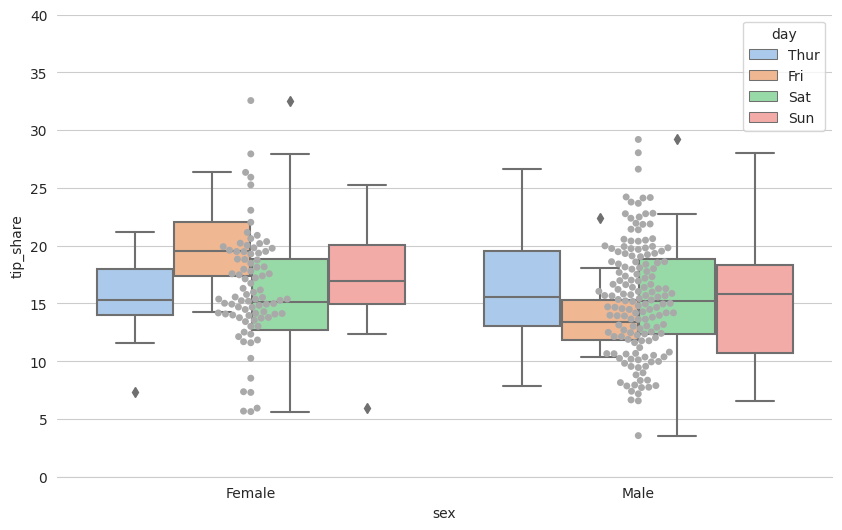

In [6]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

sns.despine(top=True,left=True,right=True)
ax.set(ylim=(0, 40))
ax.set(ylabel="Tip (%)")

sns.swarmplot(x="sex",y="tip_share",
            data=df_extract,
            color='Darkgray',
            size=5, 
            ax=ax
            )

sns.boxplot(x='sex', y = 'tip_share', 
            hue = 'day', 
            hue_order=["Thur", "Fri", "Sat", "Sun"], 
            data = df_extract, 
            palette="pastel", 
            ax=ax
            )

## Violin plot

### Plotting with sns

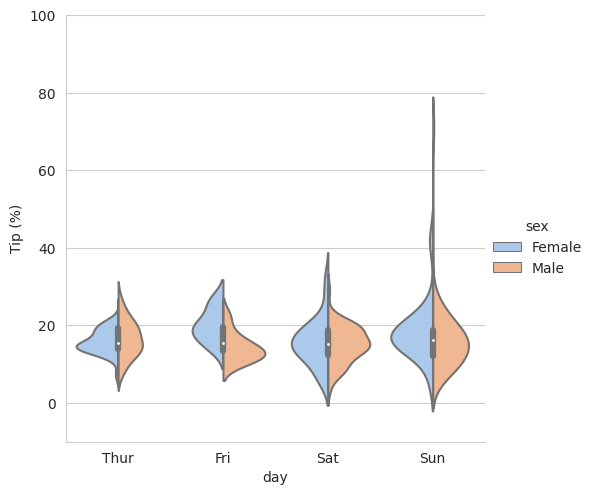

In [7]:
sns.set_style('whitegrid')
colors = ["#FFF19E", ]

g = sns.catplot(x='day',y ='tip_share', 
            hue ='sex',
            order=["Thur", "Fri", "Sat", "Sun"],
            data = df_extract, 
            kind= "violin", 
            palette="pastel", 
            split=True
            )

g.set_ylabels("Tip (%)")
g.set(ylim=(-10, 100))